In [5]:
from keras.datasets import mnist  
from keras.utils import np_utils  
import numpy as np

In [6]:
np.random.seed(10)  
  
# Read MNIST data  
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()  
  
# Translation of data  
#這裡的1指的是單色如果是RGB為28*28*3
X_Train4D = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')  
X_Test4D = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')

11501568/11490434 [==============================] - 1s 0us/step


In [8]:
# Standardize feature data  
X_Train4D_norm = X_Train4D / 255  
X_Test4D_norm = X_Test4D /255  
  
# Label Onehot-encoding  
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [9]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D 
#先建立sequential model 在一層層加上去
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_1')) 
# Create Max-Pool 1  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_1'))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',  
                 input_shape=(28,28,1),  
                 activation='relu',
                 name='conv2d_2'))  
  
# Create Max-Pool 2  
model.add(MaxPool2D(pool_size=(2,2), name='max_pooling2d_2'))  
  
# Add Dropout layer  
model.add(Dropout(0.25, name='dropout_1'))

In [10]:
model.add(Flatten(name='flatten_1'))
model.add(Dense(128, activation='relu', name='dense_1'))  
model.add(Dropout(0.5, name='dropout_2'))
model.add(Dense(10, activation='softmax', name='dense_2'))

In [11]:
model.summary()  
print("")  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2

In [12]:
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
# 開始訓練  
train_history = model.fit(x=X_Train4D_norm,  
                          y=y_TrainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=1)

Epoch 1/10
160/160 [==============================] - 35s 205ms/step - loss: 0.5050 - accuracy: 0.8426 - val_loss: 0.1013 - val_accuracy: 0.9689
Epoch 2/10
160/160 [==============================] - 32s 201ms/step - loss: 0.1400 - accuracy: 0.9585 - val_loss: 0.0702 - val_accuracy: 0.9785
Epoch 3/10
160/160 [==============================] - 32s 202ms/step - loss: 0.1018 - accuracy: 0.9694 - val_loss: 0.0530 - val_accuracy: 0.9845
Epoch 4/10
160/160 [==============================] - 32s 198ms/step - loss: 0.0837 - accuracy: 0.9754 - val_loss: 0.0465 - val_accuracy: 0.9868
Epoch 5/10
160/160 [==============================] - 34s 211ms/step - loss: 0.0705 - accuracy: 0.9784 - val_loss: 0.0411 - val_accuracy: 0.9881
Epoch 6/10
160/160 [==============================] - 35s 218ms/step - loss: 0.0598 - accuracy: 0.9818 - val_loss: 0.0425 - val_accuracy: 0.9878
Epoch 7/10
160/160 [==============================] - 34s 210ms/step - loss: 0.0550 - accuracy: 0.9831 - val_loss: 0.0378 - val_ac

In [15]:
import matplotlib.pyplot as plt  
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')  
    plt.show()  
  
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
        title = "l=" + str(labels[idx])  
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  
  
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show() 

In [1]:
show_train_history(train_history, 'acc', 'val_acc')

NameError: name 'show_train_history' is not defined

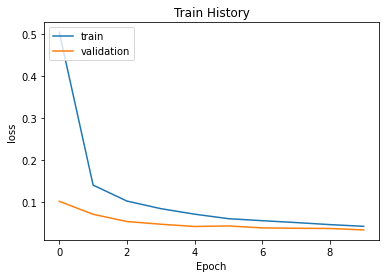

In [18]:
show_train_history(train_history, 'loss', 'val_loss')

In [21]:
scores = model.evaluate(X_Test4D_norm, y_TestOneHot)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

313/313 [==============================] - 4s 7ms/step - loss: 0.0234 - accuracy: 0.9916

	[Info] Accuracy of testing data = 99.2%


In [24]:
print("\t[Info] Making prediction of X_Test4D_norm")
prediction = model.predict(X_Test4D_norm)
prediction=np.argmax(prediction,axis=1)
# prediction = model.predict_classes(X_Test4D_norm)  # Making prediction and save result to prediction  
print()  
print("\t[Info] Show 10 prediction result (From 240):")  
print("%s\n" % (prediction[240:250]))

	[Info] Making prediction of X_Test4D_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



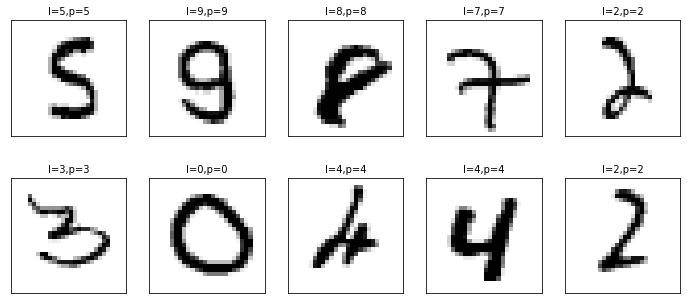

In [25]:
plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)